## In this session, we will read time series data using Pandas, understand how decomposition models work and time series frequency can be modified 

### importing required libraries

In [2]:
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

# Reading time series

## Example 1

In [2]:
 df1 = pd.read_csv('AirPassenger.csv')

checking datatypes

In [3]:
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

Pandas unable to identify Year-Month column as a date object

Using 'parse_dates' input, pandas will be able to identify that the data is time series.

In [4]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'])

In [5]:
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

Now the time series reference is approprately identified.

It is recommended that we make our time series reference as the index

In [6]:
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

In [7]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Using time series reference as index, We can conveniently do slicing i.e. obtain data for a specific time period.

In [8]:
df1['1951-04-01':'1952-01-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


We can check values corresponding to a specific time point aswell

In [9]:
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

## Example 2 

In [10]:
df2 = pd.read_csv('Gas.csv')

In [11]:
df2.head()

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173


Lets drop unwanted columns and add time-stamp to series

In [12]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df2.head()

,x
0,1709
1,1646
2,1794
3,1878
4,2173


In [14]:
date = pd.date_range(start='1/1/1956', end='1/1/1996', freq='M')
date

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31', '1995-09-30', '1995-10-31',
               '1995-11-30', '1995-12-31'],
              dtype='datetime64[ns]', length=480, freq='M')

In [15]:
df2['Time_Stamp'] = pd.DataFrame(date)

In [16]:
df2.head()

,x,Time_Stamp
0,1709,1956-01-31
1,1646,1956-02-29
2,1794,1956-03-31
3,1878,1956-04-30
4,2173,1956-05-31


In [17]:
df2=df2.set_index('Time_Stamp')

In [18]:
df2.head()

,x
Time_Stamp,
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173


## Example 3

In [19]:
df3= pd.read_csv('RetailTurnover.csv')

In [20]:
df3.head()

,Year,Quarter,Turnover
0,1982,Q3,13423.2
1,1982,Q4,13128.8
2,1983,Q1,15398.8
3,1983,Q2,12964.2
4,1983,Q3,13133.5


In [21]:
df3.tail()

,Year,Quarter,Turnover
34,1991,Q1,17115.2
35,1991,Q2,14284.9
36,1991,Q3,14558.8
37,1991,Q4,14914.3
38,1992,Q1,17342.3


data is recorder for the period of 1982 through 1992 on quarterly basis

converting above data into time series

In [22]:
quarters= pd.date_range(start='9/30/1982', end='3/31/1992', freq='Q')

In [23]:
quarters

DatetimeIndex(['1982-09-30', '1982-12-31', '1983-03-31', '1983-06-30',
               '1983-09-30', '1983-12-31', '1984-03-31', '1984-06-30',
               '1984-09-30', '1984-12-31', '1985-03-31', '1985-06-30',
               '1985-09-30', '1985-12-31', '1986-03-31', '1986-06-30',
               '1986-09-30', '1986-12-31', '1987-03-31', '1987-06-30',
               '1987-09-30', '1987-12-31', '1988-03-31', '1988-06-30',
               '1988-09-30', '1988-12-31', '1989-03-31', '1989-06-30',
               '1989-09-30', '1989-12-31', '1990-03-31', '1990-06-30',
               '1990-09-30', '1990-12-31', '1991-03-31', '1991-06-30',
               '1991-09-30', '1991-12-31', '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [24]:
df3['Time_Stamp']=pd.DataFrame(quarters)

In [25]:
df3.head()

,Year,Quarter,Turnover,Time_Stamp
0,1982,Q3,13423.2,1982-09-30
1,1982,Q4,13128.8,1982-12-31
2,1983,Q1,15398.8,1983-03-31
3,1983,Q2,12964.2,1983-06-30
4,1983,Q3,13133.5,1983-09-30


dropping unwanted columns and making time-stamp as index for the series

In [26]:
df3.drop(['Year','Quarter'],axis=1,inplace=True)
df3=df3.set_index('Time_Stamp')

In [27]:
df3.head()

,Turnover
Time_Stamp,
1982-09-30,13423.2
1982-12-31,13128.8
1983-03-31,15398.8
1983-06-30,12964.2
1983-09-30,13133.5


## Multivariate Time Series

In [28]:
df4= pd.read_csv('Daily_electricity_consumption.csv',)

In [29]:
df4.head()

,date_time,active_power_consumed,meter_reading
0,01-01-2009,0.976869,1.946528
1,02-01-2009,1.616326,8.222917
2,03-01-2009,1.328817,7.249306
3,04-01-2009,1.347218,2.253472
4,05-01-2009,1.113889,6.006944


In [30]:
date = pd.date_range(start='1/1/2009', end='11/26/2010', freq='D')
date

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', length=695, freq='D')

In [31]:
df4['Time_Stamp'] = pd.DataFrame(date)

In [32]:
df4=df4.set_index('Time_Stamp')

In [33]:
df4=df4.drop('date_time',axis=1)

In [34]:
df4.head()

,active_power_consumed,meter_reading
Time_Stamp,,
2009-01-01,0.976869,1.946528
2009-01-02,1.616326,8.222917
2009-01-03,1.328817,7.249306
2009-01-04,1.347218,2.253472
2009-01-05,1.113889,6.006944


## Plotting time series

### Plotting Air Passanger time series data

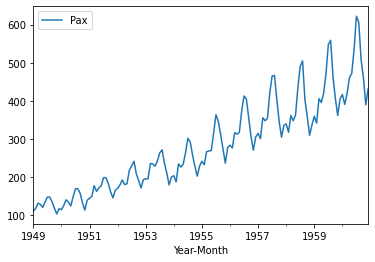

In [35]:
df1.plot()
plt.show()

We can increase the size of the plot

<AxesSubplot:xlabel='Year-Month'>

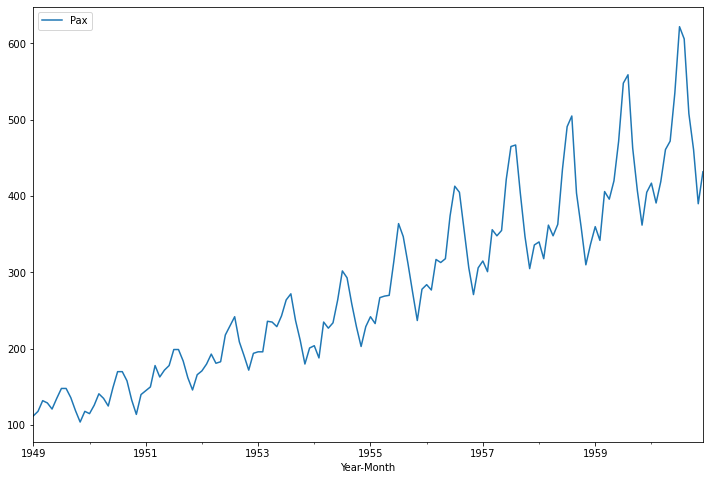

In [36]:
df1.plot(figsize=(12,8))

we can include gridlines to the plot

<AxesSubplot:xlabel='Year-Month'>

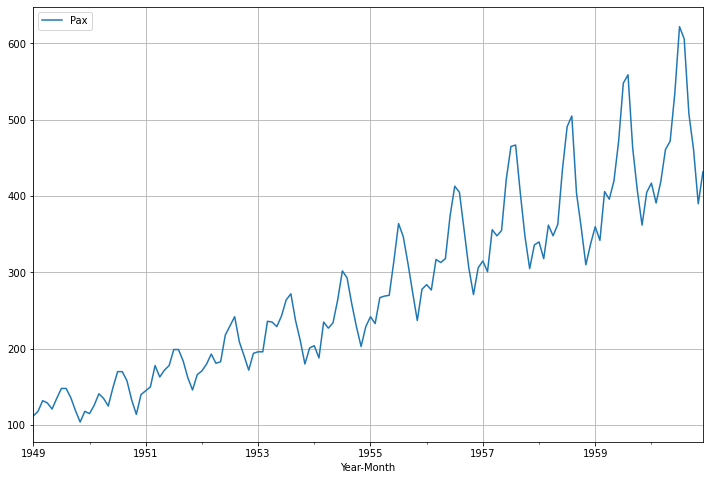

In [37]:
df1.plot(figsize=(12,8),grid=True)

### for multivariate time series

<AxesSubplot:xlabel='Time_Stamp'>

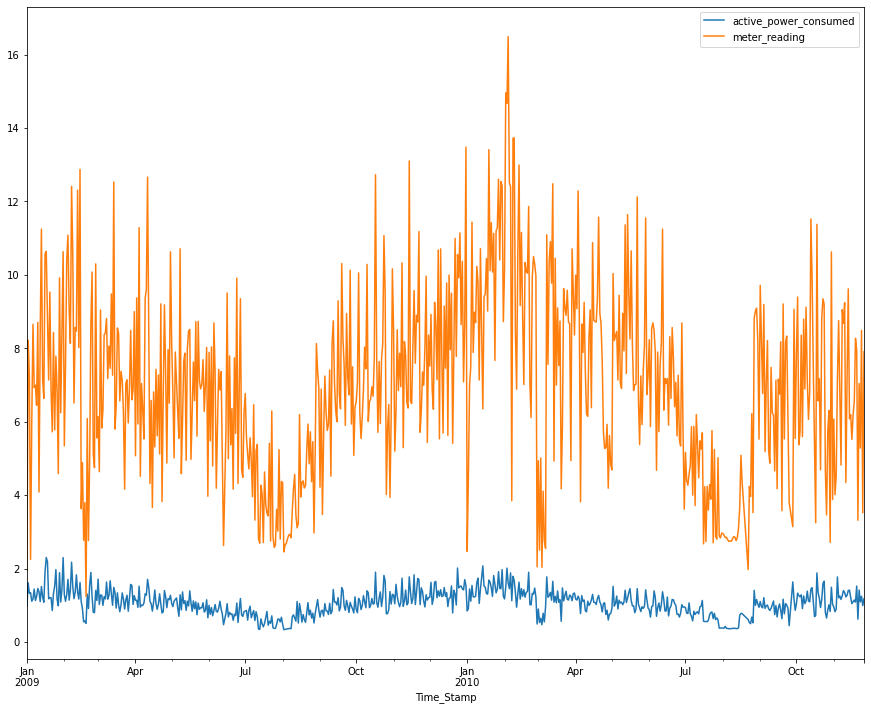

In [38]:
df4.plot(figsize=(15,12))

# Handling missing values 

No missing data is allowed in time series as data is ordered.
It is simply not possible to shift the series to fill in the gaps.

In [2]:
df4=pd.read_csv('Shoe Sales.csv',parse_dates = ['Month'], index_col = 'Month')

In [3]:
df4.head()

,No. of Pairs
Month,
2011-01-01,742
2011-02-01,741
2011-03-01,896
2011-04-01,951
2011-05-01,1030


Let us replace the number of pairs for 2012-May which is 932 as np.NaN.

In [4]:
df4.replace(932, np.NaN, inplace = True)

In [5]:
df4.isnull().sum()

No. of Pairs    1
dtype: int64

#### Time series has one misiing value

#### NA value can be replaced using resampling.

In [6]:
## imputing using rolling mean
daily = df4.fillna(df4.rolling(6,min_periods=1).mean())


## imputing using interpolation
df4_imputed= df4.interpolate(method = 'linear')

In [10]:
df4_imputed.loc['2012-05-01']

No. of Pairs    976.5
Name: 2012-05-01 00:00:00, dtype: float64

number of pairs for 2012-May which was 932 is now replaced by value 976.5

In [11]:
daily.loc['2012-05-01']

No. of Pairs    924.2
Name: 2012-05-01 00:00:00, dtype: float64

In [21]:
df4_imputed.isnull().sum()

No. of Pairs    0
dtype: int64

In [22]:
daily.isnull().sum()

No. of Pairs    0
dtype: int64

# Modifying time series range 

### Let's change the monthly series to quarterly.

In [53]:
df1_q = df1.resample('Q').sum()

In [54]:
df1_q.head()

,Pax
Year-Month,
1949-03-31,362
1949-06-30,385
1949-09-30,432
1949-12-31,341
1950-03-31,382


<AxesSubplot:xlabel='Year-Month'>

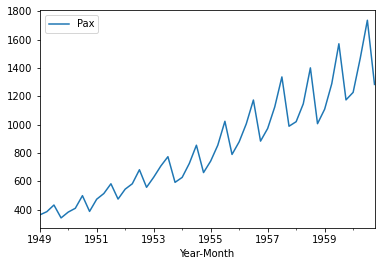

In [55]:
df1_q.plot()

# Decomposition of time series

### Air Passanger data

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(df1, values = 'Pax', columns = df1.index.year,index = df1.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

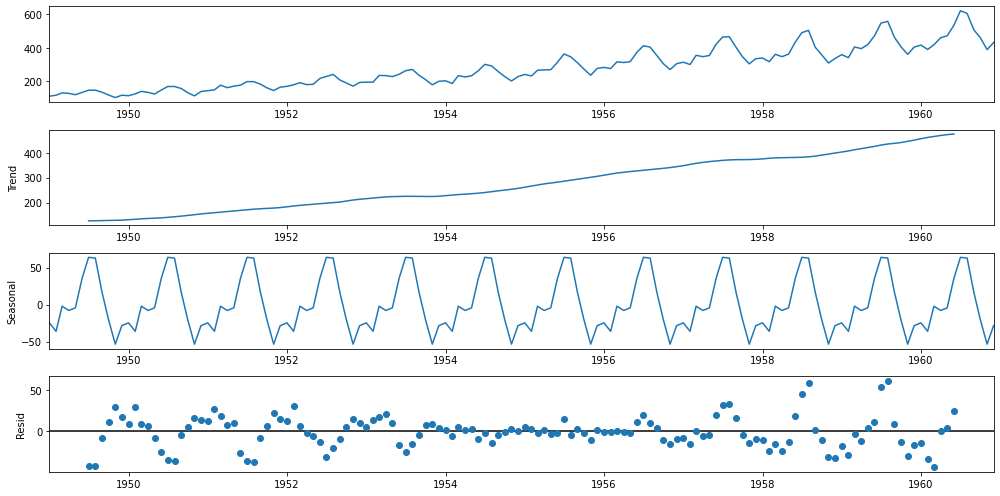

In [38]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

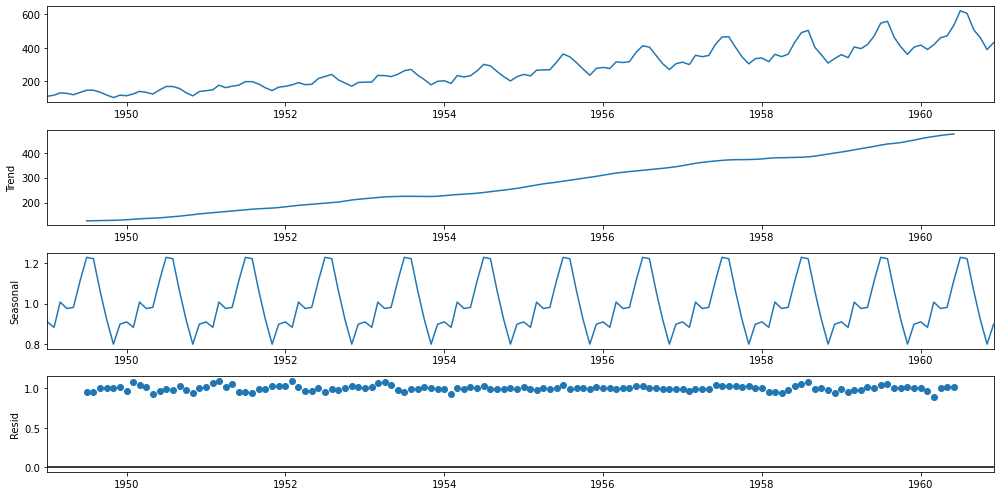

In [39]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

### Decomposition by Loess

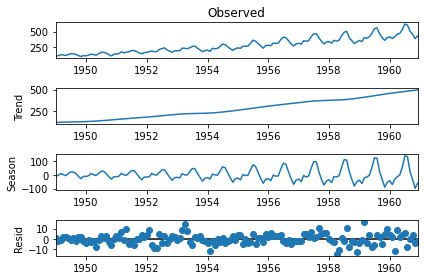

In [60]:
decomposition = STL(df1).fit()
decomposition.plot();

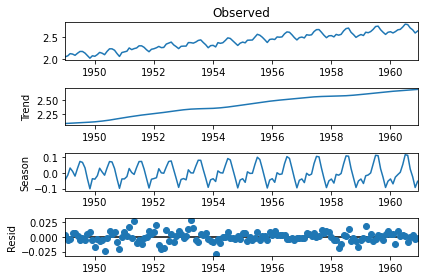

In [64]:
decomposition = STL(np.log10(df1)).fit()
decomposition.plot();

## Moving Average

In [14]:
df5=pd.read_csv('Stock.csv', parse_dates = ['TimeStamp'], index_col = 'TimeStamp',dayfirst=True)

In [15]:
df5

,Close
TimeStamp,
2017-05-01,64.57
2017-05-02,63.78
2017-05-03,62.20
2017-05-04,59.09
2017-05-05,61.67
...,...
2019-01-02,59.41
2019-01-03,59.28
2019-01-04,59.49


<AxesSubplot:xlabel='TimeStamp'>

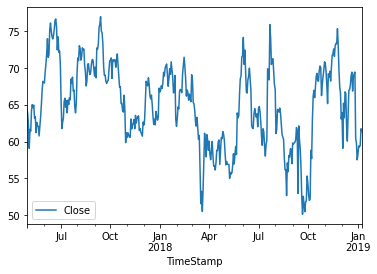

In [16]:
df5.plot()

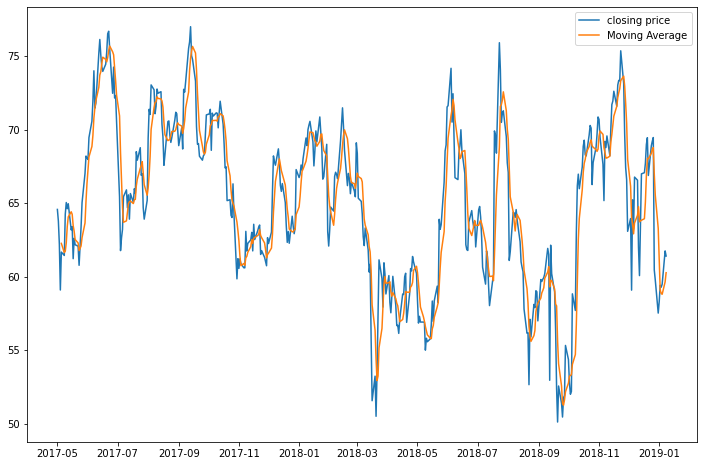

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(5).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()

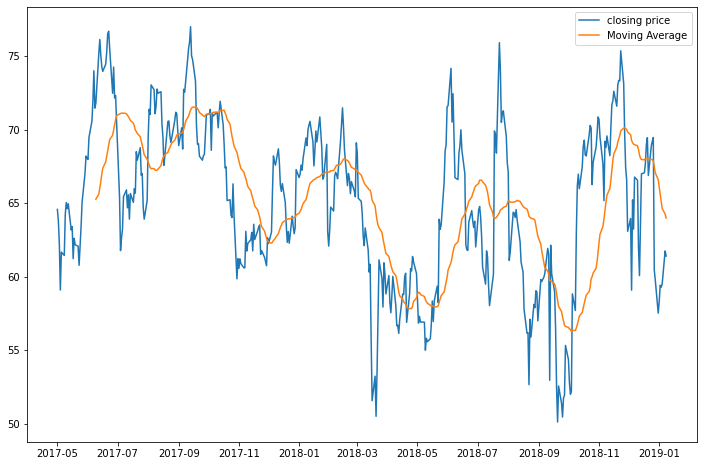

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df5, label='closing price')
plt.plot(df5.rolling(30).mean(), label='Moving Average')
plt.legend(loc='best')
plt.show()